In [47]:
import pandas as pd
df=pd.read_csv('AmazonAlexa_Reviews.csv')
df.head(10)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1
3,5,31-Jul-18,Charcoal Fabric,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,"I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.",1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use. It IS a great alarm. If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response. She does not seem to be very smartbon politics yet.",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'm working on getting one in every room of my house. I really like what features they offer specifily playing music on all Echos and controlling the lights throughout my house.,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,"Love it! I’ve listened to songs I haven’t heard since childhood! I get the news, weather, information! It’s great!",1


In [31]:
df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [32]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

<Axes: xlabel='feedback', ylabel='count'>

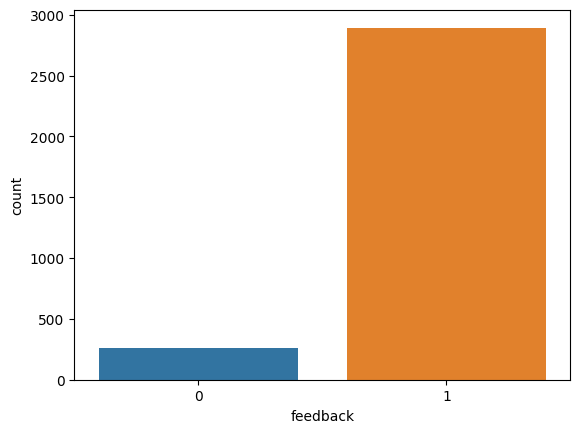

In [33]:
import seaborn as sns
sns.countplot(x='feedback',data=df)

In [48]:
reviews=df.drop(['date','rating','variation','feedback'],axis=1)
pd.set_option('display.max_colwidth',None)
reviews

,verified_reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home."
3,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well."
4,Music
...,...
3145,"Perfect for kids, adults and everyone in between!!"
3146,"Listening to music, searching locations, checking time, looking up weather. There are many more task to learn. It was simple to set up."
3147,"I do love these things, i have them running my entire home, TV, all my lights, my thermostat, my front door dead bolt, the cameras... and i love listening to npr. these things are well worth the value and they really shine once you stat adding smart devices and you can control your entire home like its right out of star trek.... I named mine computer to get the feel... but its amazing what you can do with these devices and smart systems."
3148,"Only complaint I have is that the sound quality isn't great. I mostly use it for commands though, and I have another dot hooked up to my stereo system to play music through. I have a couple friends that have a dot and don't mind the audio quality, but if you're bothered by that kind of thing I'd go with the full size echo or make sure you hook the do up to some larger speakers."


In [50]:
df['clean_r']=reviews.apply(lambda x: x.astype(str).str.lower())
df['clean_r']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                   love my echo!
1                                                                                                                                                                                                                                                                                                                                                                                                                                                       loved it!
2                                                                                                   

In [58]:
import string
string.punctuation

# df['clean_r']=reviews

def remove_p(text):
    text=''.join(x for x in text if x not in string.punctuation)
    return text
df['clean_r']=df['clean_r'].apply(lambda txt: remove_p(txt))
df['clean_r']

0                                                                                                                                                                                                                                                                                                                                                                                                                                  love my echo
1                                                                                                                                                                                                                                                                                                                                                                                                                                      loved it
2                                                                                                                                       

In [59]:
import re

def r_emoticons(text):
    pattern=re.compile(
        "["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        "]+",flags=re.UNICODE
    )
    return  pattern.sub(r'',text)

line = "Hello world! 😀😎😁👌🎶💖"
print(r_emoticons(line))

df['clean_r']=df['clean_r'].apply(lambda txt: r_emoticons(txt))

Hello world! 


In [61]:
import nltk
from nltk.tokenize import word_tokenize
# nltk.download('punkt')

def tokenization(text):
    tokens=word_tokenize(text)
    return tokens

df['clean_r']=df['clean_r'].apply(lambda txt: tokenization(txt))
df['clean_r']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  [love, my, echo]
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [63]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shreeyash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:
from nltk.corpus import stopwords

stopword_list=stopwords.words('english')

def r_stopwords(text):
    text=[word for word in text if word not in stopword_list]
    return text

df['clean_r']=df['clean_r'].apply(lambda txt: r_stopwords(txt))
df['clean_r']

0                                                                                                                                                                                                                                                                                                             [love, echo]
1                                                                                                                                                                                                                                                                                                                  [loved]
2                                                                                                                                                                                          [sometimes, playing, game, answer, question, correctly, alexa, says, got, wrong, answers, like, able, turn, lights, away, home]
3                                                      

In [67]:
df.head(50)

,rating,date,variation,verified_reviews,feedback,clean_r
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,"[love, echo]"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,[loved]
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1,"[sometimes, playing, game, answer, question, correctly, alexa, says, got, wrong, answers, like, able, turn, lights, away, home]"
3,5,31-Jul-18,Charcoal Fabric,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1,"[lot, fun, thing, 4, yr, old, learns, dinosaurs, control, lights, play, games, like, categories, nice, sound, playing, music, well]"
4,5,31-Jul-18,Charcoal Fabric,Music,1,[music]
5,5,31-Jul-18,Heather Gray Fabric,"I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.",1,"[received, echo, gift, needed, another, bluetooth, something, play, music, easily, accessible, found, smart, speaker, ’, wait, see, else]"
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use. It IS a great alarm. If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response. She does not seem to be very smartbon politics yet.",1,"[without, cellphone, use, many, features, ipad, see, use, great, alarm, u, r, almost, deaf, hear, alarm, bedroom, living, room, reason, enough, keep, herit, fun, ask, random, questions, hear, response, seem, smartbon, politics, yet]"
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'm working on getting one in every room of my house. I really like what features they offer specifily playing music on all Echos and controlling the lights throughout my house.,1,"[think, 5th, one, ive, purchased, im, working, getting, one, every, room, house, really, like, features, offer, specifily, playing, music, echos, controlling, lights, throughout, house]"
8,5,30-Jul-18,Heather Gray Fabric,looks great,1,"[looks, great]"
9,5,30-Jul-18,Heather Gray Fabric,"Love it! I’ve listened to songs I haven’t heard since childhood! I get the news, weather, information! It’s great!",1,"[love, ’, listened, songs, ’, heard, since, childhood, get, news, weather, information, ’, great]"
